**OASIS INFOBYTE**

**DATA SCIENCE INTERNSHIP TASK 04:**

**EMAIL SPAM DETECTION WITH MACHINE LEARNING**

**MEMBER:SWEETHA . A**

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [113]:
# Load the dataset
data = pd.read_csv('spam.csv', usecols=['v1', 'v2'],encoding='Latin-1')
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [114]:
print(f'No of rows in the dataset:',data.shape[0])
print(f'No of columns in the dataset:',data.shape[1])

No of rows in the dataset: 5572
No of columns in the dataset: 2


In [115]:
# Rename columns for clarity
data.columns = ['Category', 'Message']
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [116]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [118]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [119]:
data.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [120]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [121]:
null_values=data.isnull().sum().sum()
print(f'Total no of null values:',null_values)

Total no of null values: 0


In [122]:
data2=data.drop_duplicates()
data2

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


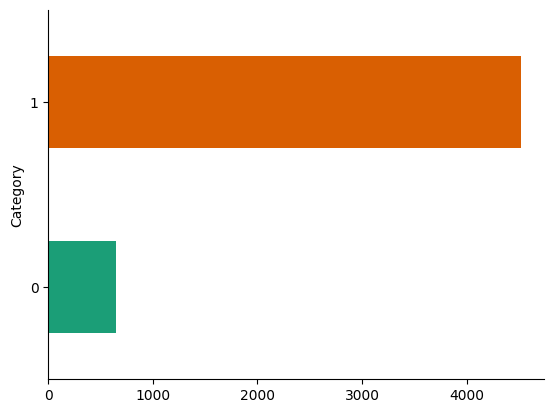

In [162]:
from matplotlib import pyplot as plt
import seaborn as sns
data2.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [123]:
print(f'No of rows in the dataset:',data2.shape[0])
print(f'No of columns in the dataset:',data2.shape[1])

No of rows in the dataset: 5169
No of columns in the dataset: 2


In [124]:
data2.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [125]:
data2.loc[data2['Category'] == 'ham', 'Category',] = 1
data2.loc[data2['Category'] == 'spam', 'Category',] = 0

<ipython-input-125-e5e1c4f8dbaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[data2['Category'] == 'ham', 'Category',] = 1
<ipython-input-125-e5e1c4f8dbaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.loc[data2['Category'] == 'spam', 'Category',] = 0


In [126]:
X=data2['Message']
Y=data2['Category']

In [127]:
pd.DataFrame(X)

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [128]:
pd.DataFrame(Y)

,Category
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [130]:
X.shape

(5169,)

In [131]:
X_train.shape

(4135,)

In [84]:
X_test.shape

(1034,)

In [132]:
Y.shape

(5169,)

In [133]:
Y_train.shape

(4135,)

In [134]:
Y_test.shape

(1034,)

In [135]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

In [136]:
X_train

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Message, Length: 4135, dtype: object

In [147]:
X_train_features

<4135x7378 sparse matrix of type '<class 'numpy.float64'>'
	with 31488 stored elements in Compressed Sparse Row format>

In [148]:
model=LogisticRegression()

In [149]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [150]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data=accuracy_score(Y_train,prediction_on_training_data)

In [151]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.962273276904474


In [152]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data=accuracy_score(Y_test,prediction_on_test_data)

In [153]:
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.960348162475822


In [158]:
input_your_mail = ["this is the second time we have tried to contact you. you won 10$ cash prize. please contact us as soon as possible"]
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail
